Here we analyse the results evaluated for models on TabularToy(0.25) at low and high $\lambda$, at both the level of single models and model classes.

Previous required steps: 
- Train the soft CBMs with 
`python experiments/run_experiments.py -c experiments/configs/tabulartoy.yaml` first

- Evaluate their performance and leakage scores with `python experiments/evaluate_models/evaluate_models_tabulartoy.py`

Load modules:

In [1]:
import joblib
from experiments.fuse_models_folds import *
from experiments.plotting import *

master_folder = ""
n_fold = 5
results_folder = master_folder + "results/tabulartoy_25_10k_models/"
fused_results_folder = master_folder + "results/tabulartoy_25_10k_fused_models/"
checkpoint_classes = [
    "CBM_" + "Sigmoid_01",
    "CBM_" + "Sigmoid_5",
]

## Analysing single models:

We now analyse the results for two of the single models trained and evaluated before, the first folds at $\lambda = 0.1$ and 5.

In [2]:
folder_checkpoint_dict = {}
checkpoint_names = model_names_fold_from_classes(checkpoint_classes, n_fold = n_fold)
folder_checkpoint_dict[results_folder] = checkpoint_names

results = gather_single_results(folder_checkpoint_dict)

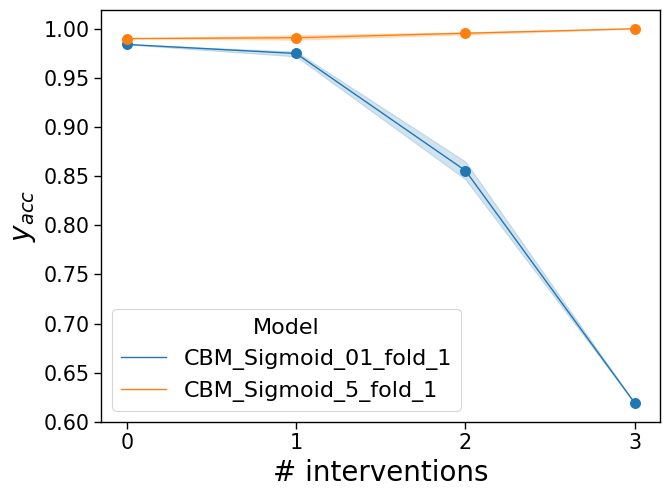

In [3]:
# Intervention performance:
checkpoint_names = [
    "CBM_Sigmoid_01_fold_1",
    "CBM_Sigmoid_5_fold_1"
]
plot_intervention_performance(results, policy="random", checkpoint_names = checkpoint_names)

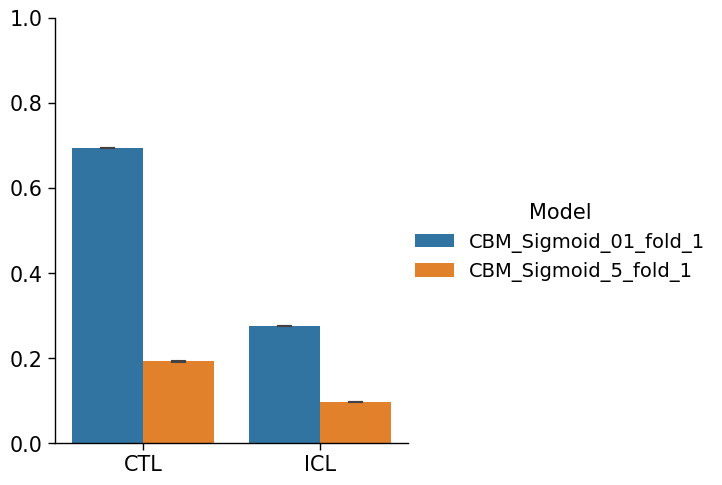

In [4]:
# CTL and ICL leakage scores:
plot_model_vs_model_scores(results, score_labels = ["CTL", "ICL"], 
                           checkpoint_names = checkpoint_names,relabel_score = None)

As expected, models with lower concept supervision have exhibit worse intervention performance and higher leakage scores.

## Analysing model classes:

We would like to confirm these results at the level of model classes across folds.

We first summarise and save the results for each model class, by fusing results from single models:

In [5]:
folder_checkpoint_dict = {}
folder_checkpoint_dict[results_folder] = checkpoint_classes

for results_fld, checkpoint_classes in folder_checkpoint_dict.items():
    for checkpoint_class in checkpoint_classes:
        save_path = fused_results_folder + checkpoint_class + ".dict"
        fuse_folds(checkpoint_class = checkpoint_class, results_folder = results_fld, 
                   n_fold = n_fold, save_path = save_path)
        
folder_checkpoint_dict = {}
folder_checkpoint_dict[fused_results_folder] = checkpoint_classes
fused_results = gather_single_results(folder_checkpoint_dict)
joblib.dump(fused_results, fused_results_folder + "results_fused_models.dict");

In [6]:
# Load the obtained results file:
fused_results_path = fused_results_folder + "results_fused_models.dict"
fused_results = joblib.load(fused_results_path)

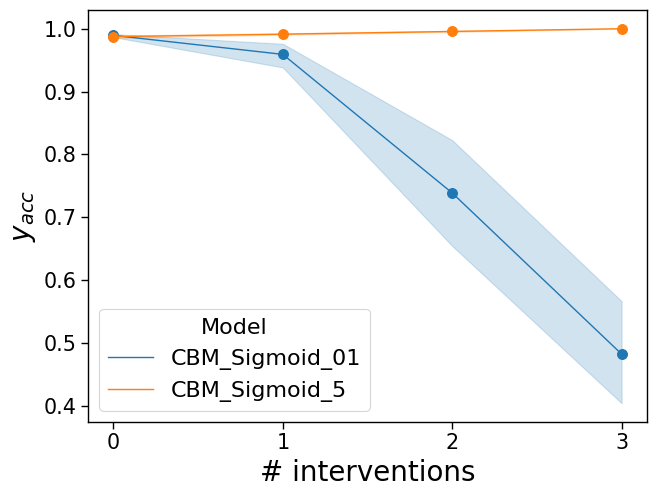

In [7]:
# Intervention performance:
plot_intervention_performance(fused_results, policy="random")

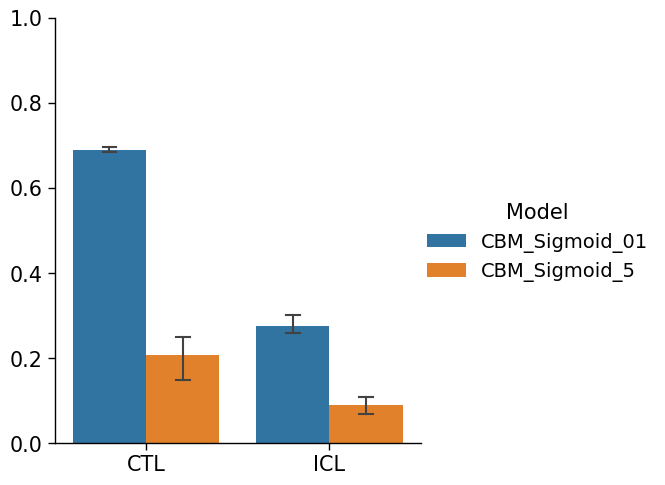

In [8]:
# CTL and ICL leakage scores:
plot_model_vs_model_scores(fused_results, score_labels = ["CTL", "ICL"], relabel_score = None)

Intervention performance and leakage scores confirm that soft CBMs at low lambda have significantly higher leakage.

There is more variability than in the case of single models, as a result of both scores estimation uncertainties and training stochasticity.

